In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

survival        Survival
                (0 = No; 1 = Yes)
                
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation

In [157]:
titanic = pd.read_csv('train.csv')

In [158]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

In [160]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]
    
titanic["who"] = titanic[["Age", "Sex"]].apply(woman_child_or_man, axis=1)

In [161]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who
0,1,0,3,male,22.0,1,0,7.2500,S,man
1,2,1,1,female,38.0,1,0,71.2833,C,woman
2,3,1,3,female,26.0,0,0,7.9250,S,woman
3,4,1,1,female,35.0,1,0,53.1000,S,woman
4,5,0,3,male,35.0,0,0,8.0500,S,man


### Статистика по пасажирах в наборі

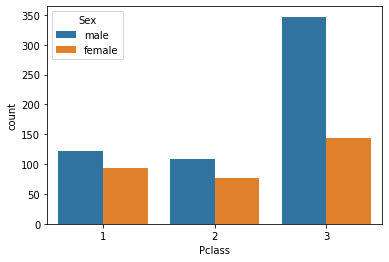

In [8]:
sns.countplot("Pclass", data=titanic, hue="Sex")

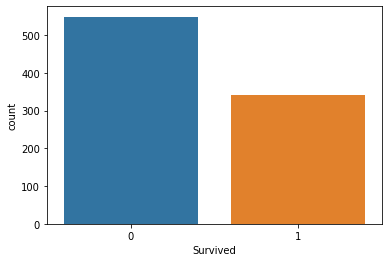

In [179]:
sns.countplot("Survived", data=titanic)

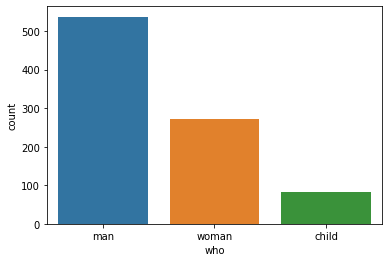

In [9]:
sns.countplot("who", data=titanic)

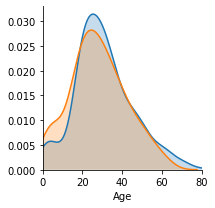

In [14]:
fg = sns.FacetGrid(titanic, hue="Sex")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80))

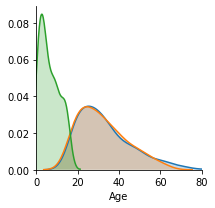

In [16]:
fg = sns.FacetGrid(titanic, hue="who")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80))

In [ ]:
# Який процент дітей вижило? 

### Статистика по класу перевезення

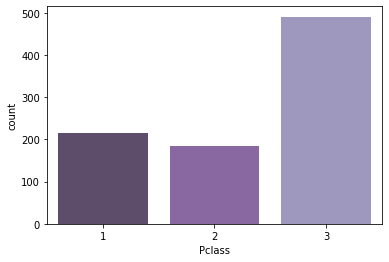

In [17]:
sns.countplot("Pclass", data=titanic, palette="BuPu_d");

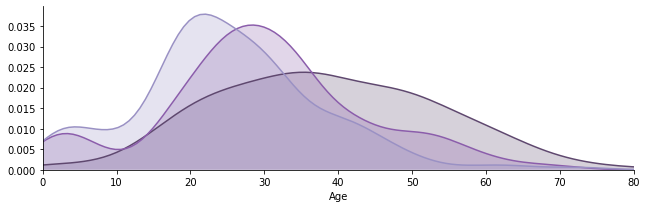

In [137]:
fg = sns.FacetGrid(titanic, hue="Pclass", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

### Вартість квитка

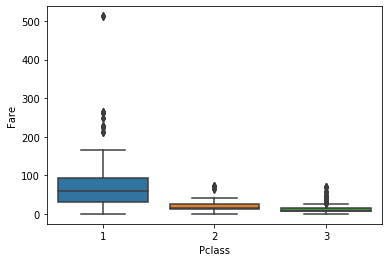

In [20]:
sns.boxplot(titanic['Pclass'], titanic['Fare'])
# дослідити, що за квитки вартість > 300

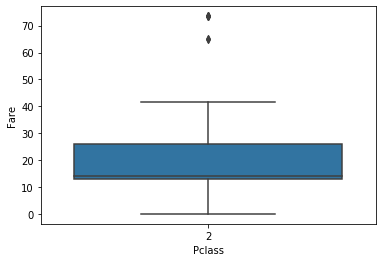

In [140]:
sns.boxplot(titanic[titanic['Pclass']==2]['Pclass'], titanic[titanic['Pclass']==2]['Fare'])

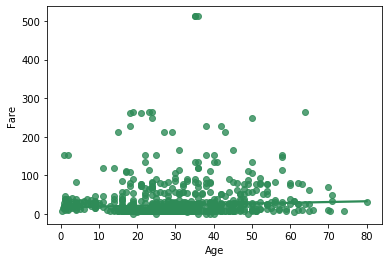

In [23]:
sns.regplot("Age", "Fare", data=titanic, robust=True, ci=None, color="seagreen")

In [ ]:
# відкинути виброси 

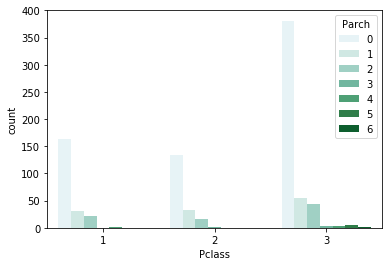

In [25]:
sns.countplot("Pclass", data=titanic, hue="Parch", palette="BuGn");

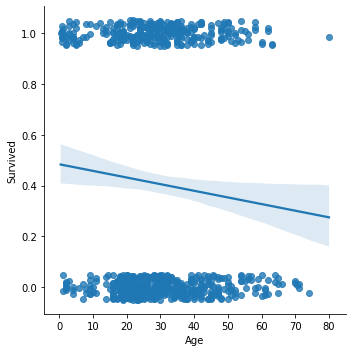

In [142]:
sns.lmplot("Age", "Survived", titanic,  y_jitter=.05)

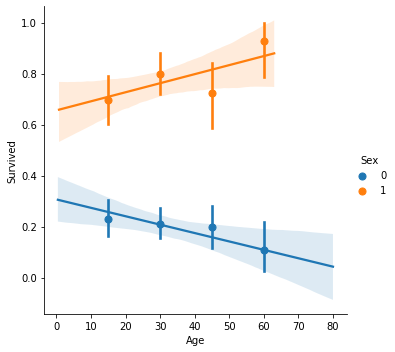

In [144]:
age_bins = [15, 30, 45, 60]
sns.lmplot("Age", "Survived", titanic, hue="Sex", x_bins=age_bins)

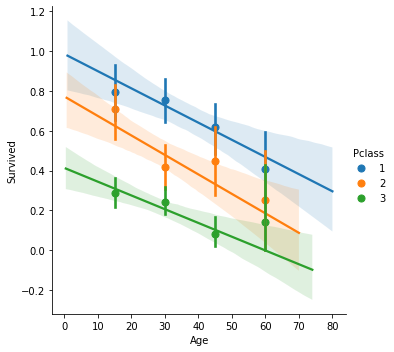

In [37]:
sns.lmplot("Age", "Survived", titanic, hue="Pclass", x_bins=age_bins)

In [153]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who
0,1,0,3,male,22.0,1,0,7.2500,S,man
1,2,1,1,female,38.0,1,0,71.2833,C,woman
2,3,1,3,female,26.0,0,0,7.9250,S,woman
3,4,1,1,female,35.0,1,0,53.1000,S,woman
4,5,0,3,male,35.0,0,0,8.0500,S,man


In [163]:
titanic['Sex_code'] = titanic['Sex'].map( {'female': 1, 'male': 0} )
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,Sex_code
0,1,0,3,male,22.0,1,0,7.2500,S,man,0
1,2,1,1,female,38.0,1,0,71.2833,C,woman,1
2,3,1,3,female,26.0,0,0,7.9250,S,woman,1
3,4,1,1,female,35.0,1,0,53.1000,S,woman,1
4,5,0,3,male,35.0,0,0,8.0500,S,man,0


In [45]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [47]:
titanic[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,S,man,2
1,2,1,1,1,38.0,1,0,71.2833,C,woman,2
2,3,1,3,1,26.0,0,0,7.9250,S,woman,1
3,4,1,1,1,35.0,1,0,53.1000,S,woman,2
4,5,0,3,0,35.0,0,0,8.0500,S,man,1


In [165]:
pd.get_dummies(titanic['Pclass'],drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [166]:
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
pclass.columns = ["2nd_class","3rd_class"]
pclass

,2nd_class,3rd_class
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [56]:
sibsp = pd.get_dummies(titanic['SibSp'],drop_first=True).copy()
sibsp

,1,2,3,4,5,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,1,0,0,0,0,0
889,0,0,0,0,0,0


In [167]:
def new_age(age):
    if 0<=age and age<18:
        return 0
    elif 18<=age and age<25:
        return 1
    elif 25<=age and age<45:
        return 2
    elif 45<=age and age<55:
        return 3
    else:
        return 4
    
titanic['New age'] = titanic['Age'].map(new_age)

In [168]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,who,Sex_code,New age
0,1,0,3,male,22.0,1,0,7.2500,S,man,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,woman,1,2
2,3,1,3,female,26.0,0,0,7.9250,S,woman,1,2
3,4,1,1,female,35.0,1,0,53.1000,S,woman,1,2
4,5,0,3,male,35.0,0,0,8.0500,S,man,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,man,0,2
887,888,1,1,female,19.0,0,0,30.0000,S,woman,1,1
888,889,0,3,female,NaN,1,2,23.4500,S,woman,1,4
889,890,1,1,male,26.0,0,0,30.0000,C,man,0,2


In [103]:
df = titanic[['Survived', 'Sex', 'Fare', 'new_age']]
df = pd.concat([df, pclass], axis=1)

In [104]:
df.tail()

,Survived,Sex,Fare,new_age,2nd_class,3rd_class
886,0,0,13.00,2,1,0
887,1,1,30.00,1,0,0
888,0,1,23.45,4,0,1
889,1,0,30.00,2,0,0
890,0,0,7.75,2,0,1


In [131]:
y = df["Survived"]
X = df.drop('Survived',axis=1)

In [176]:
#len(train_test_split(X, y, test_size=0.33))

# Варіант 1

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))


Score на трейні 0.7684563758389261
Score на тесті 0.7864406779661017


In [171]:
from sklearn import metrics

In [173]:
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions))

y_predictions = logmodel.predict(X_test)

print(metrics.classification_report(y_test,y_predictions))

confusion_matrix:
[[162  17]
 [ 52  64]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.82       179
           1       0.79      0.55      0.65       116

    accuracy                           0.77       295
   macro avg       0.77      0.73      0.74       295
weighted avg       0.77      0.77      0.76       295



# Варіант 2

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# trans = StandardScaler()

# X_standart = trans.fit_transform(X)

trans = MinMaxScaler()
X_minmax = trans.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33)

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))

Score на трейні 0.7936241610738255
Score на тесті 0.7864406779661017


In [187]:
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test,y_predictions))

y_predictions = logmodel.predict(X_test)

print(metrics.classification_report(y_test,y_predictions))

confusion_matrix:
[[133  52]
 [ 81  29]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       185
           1       0.72      0.70      0.71       110

    accuracy                           0.79       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.79      0.79      0.79       295



# Варіант 3

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# trans = StandardScaler()

# X_standart = trans.fit_transform(X)

trans = MinMaxScaler()
X_minmax = trans.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33)

logmodel = LogisticRegression(penalty='l1', C=.1)

logmodel.fit(X_train,y_train)

# accuracy - % правильно "вгаданих" значень 
print('Score на трейні', logmodel.score(X_train,y_train))

print('Score на тесті', logmodel.score(X_test,y_test))

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

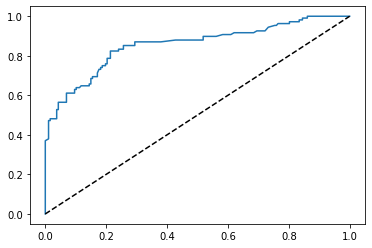

In [128]:
y_pred_proba = logmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')